In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from evaluator import Evaluator
from models import *

In [6]:
# Set plot style
sns.set(style="white", palette="tab10")
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
evaluator = Evaluator(
    '../data/raw/train_interactions.csv', '../data/raw/test_interactions_in.csv')

In [3]:
# Optimal parameters found with Bayesian Optimization
params_ppr = {
    "alpha": 0.023158004249229626,
    "popularity_weight": 0.033105547887524185,
    "num_iterations": 93,
    "interaction_weight_processing": "log"
}
params_mappr = {
    "alphas": [
        0.022625538386329365,
        0.3015889812327148,
        0.0
    ],
    "alpha_weights": [
        1.0,
        0.0,
        0.0
    ],
    "popularity_weight": 0.0,
    "num_iterations": 106,
    "interaction_weight_processing": "log"
}
params_tppr = {
    "alpha1": 0.04052983557401711,
    "alpha2": 0.0,
    "stage1_k": 148,
    "popularity_weight": 0.0,
    "num_iterations": 271,
    "interaction_weight_processing": "log"
}

In [ ]:
# Baseline models
models = [
    Random(random_state=42),
    Popularity(),
    UserKNN(n_neighbors=20),
    ItemKNN(),
    PPR(**params_ppr),
    MultiAlphaPPR(**params_mappr),
    TwoPhasePPR(**params_tppr)
]

for model in models:
    avg_metrics, std_metrics = evaluator.runEvaluation(
        model, sample_size=None, n_trials=3)
    print(f"{model.__class__.__name__}: {avg_metrics} {std_metrics}")
    evaluator.createSubmission(model, '../output/submissions')

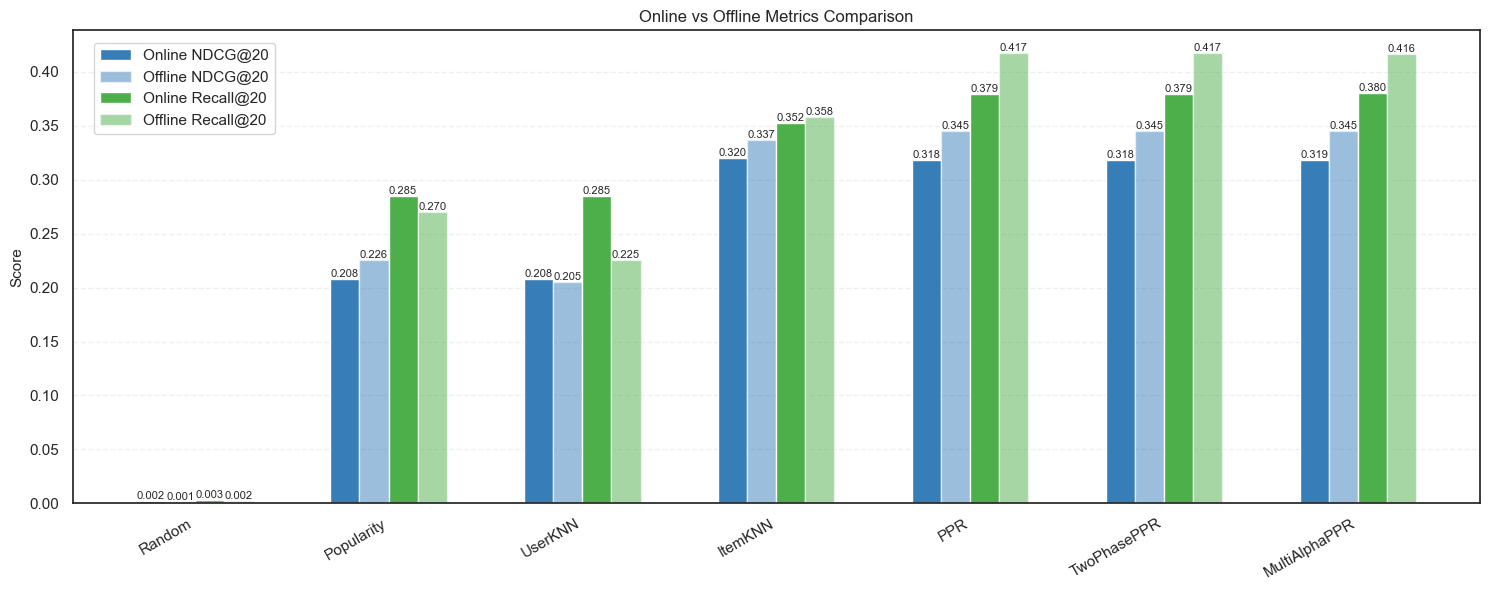

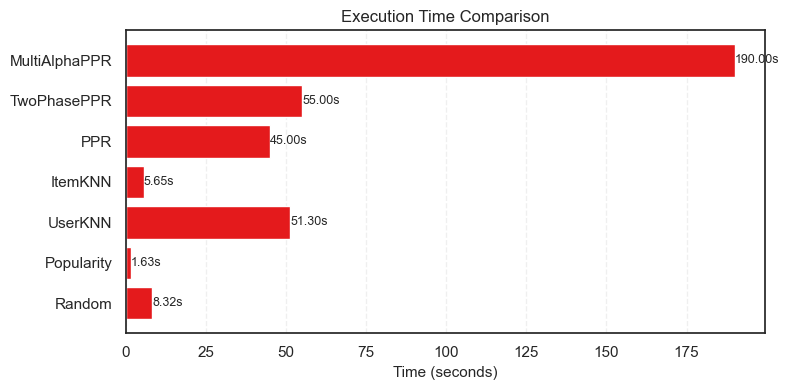

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
algorithms = ['Random', 'Popularity', 'UserKNN', 'ItemKNN', 'PPR', 'TwoPhasePPR', 'MultiAlphaPPR']
online_ndcg = [0.002, 0.2081, 0.2081, 0.3201, 0.3183, 0.3181, 0.3187]
online_recall = [0.003, 0.2851, 0.2851, 0.3521, 0.3790, 0.3790, 0.3799]
offline_ndcg = [0.001, 0.22589, 0.20476, 0.33707, 0.3449, 0.3454, 0.3450]
offline_recall = [0.002, 0.26993, 0.22534, 0.35807, 0.4172, 0.4175, 0.4163]
execution_times = [8.32, 1.632, 51.304, 5.652, 45, 55, 190]

# Set style
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11

# First Figure: Metrics Comparison
fig1, ax1 = plt.subplots(figsize=(15, 6))

bar_width = 0.15
x = np.arange(len(algorithms))

# Plot bars with SOTA colors
bars1 = ax1.bar(x - 1.5*bar_width, online_ndcg, bar_width, label='Online NDCG@20', color='#377eb8')  # Blue
bars2 = ax1.bar(x - 0.5*bar_width, offline_ndcg, bar_width, label='Offline NDCG@20', color='#377eb8', alpha=0.5)
bars3 = ax1.bar(x + 0.5*bar_width, online_recall, bar_width, label='Online Recall@20', color='#4daf4a')  # Green
bars4 = ax1.bar(x + 1.5*bar_width, offline_recall, bar_width, label='Offline Recall@20', color='#4daf4a', alpha=0.5)

# Customize first plot
ax1.set_ylabel('Score')
ax1.set_title('Online vs Offline Metrics Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms, rotation=30, ha='right')
ax1.legend(loc='upper left', bbox_to_anchor=(0.01, 0.99))
ax1.grid(True, axis='y', linestyle='--', alpha=0.3)

# Add value labels
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

for bars in [bars1, bars2, bars3, bars4]:
    add_value_labels(bars)

plt.tight_layout()

# Second Figure: Execution Time
fig2, ax2 = plt.subplots(figsize=(8, 4))

# Create horizontal bars for execution time
bars5 = ax2.barh(algorithms, execution_times, color='#e41a1c')  # Red for execution time

# Customize second plot
ax2.set_xlabel('Time (seconds)')
ax2.set_title('Execution Time Comparison')
ax2.grid(True, axis='x', linestyle='--', alpha=0.3)

# Add value labels
for bar in bars5:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}s', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()